In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier



In [123]:
df=pd.read_csv(r"C:\Users\asus\Downloads\archive (9)\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [124]:
x=df.drop(columns=["species"])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)  # Converts species names to numbers
y_test_enc = label_encoder.transform(y_test)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


In [125]:
svm=SVC(kernel="linear")
svm.fit(x_train_scaled,y_train_enc)
y_pred=svm.predict(x_test_scaled)
y_pred
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")  # Print accuracy score
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))



Model Accuracy: 0.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [126]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=2,min_samples_split=2,min_samples_leaf=5,max_features=None)
DT.fit(x_train_scaled,y_train_enc)
ypred=DT.predict(x_test_scaled)
ypred
accuracy1=accuracy_score(y_test,ypred)
print(f"Model Accuracy: {accuracy1:.2f}")  # Print accuracy score
print("\nClassification Report:\n", classification_report(y_test_enc, ypred, target_names=label_encoder.classes_))



Model Accuracy: 0.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [128]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [130]:
RF=RandomForestClassifier(max_features="sqrt",min_samples_leaf=1,min_samples_split=5,n_estimators=100)
RF.fit(x_train_scaled,y_train_enc)
ypp=RF.predict(x_test_scaled)
ypp
accuracy2=accuracy_score(y_test,ypp)
print(f"Model Accuracy: {accuracy2:.2f}")  # Print accuracy score
print("\nClassification Report:\n", classification_report(y_test_enc, ypp, target_names=label_encoder.classes_))


Model Accuracy: 0.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



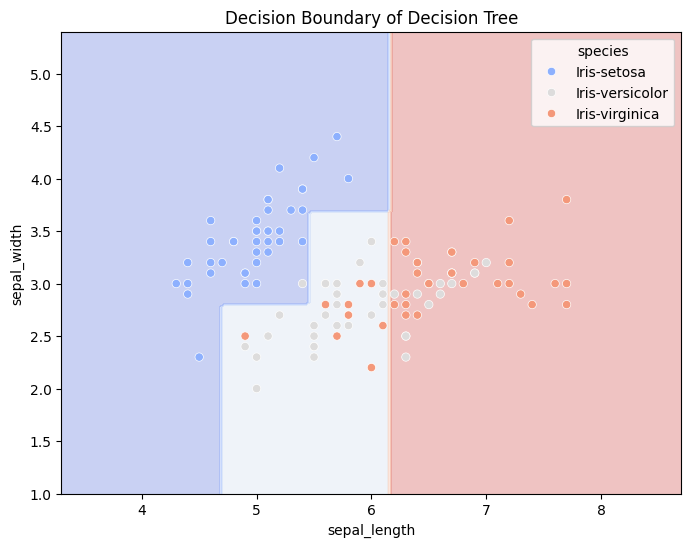

In [120]:


# Select two features for visualization
feature_1, feature_2 = "sepal_length", "sepal_width"

X_vis = x_train[[feature_1, feature_2]]
y_vis = y_train

# Encode labels as numerical values
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)  # Convert categorical labels to numeric

# Train model with two features
clf_vis = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_vis.fit(X_vis, y_vis_encoded)

# Create a grid for plotting
x_min, x_max = X_vis[feature_1].min() - 1, X_vis[feature_1].max() + 1
y_min, y_max = X_vis[feature_2].min() - 1, X_vis[feature_2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid_points, columns=[feature_1, feature_2])  # Add column names
Z = clf_vis.predict(grid_df)  # Use DataFrame instead of raw NumPy array

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=feature_1, y=feature_2, hue=y_vis, palette="coolwarm", data=X_vis)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Decision Boundary of Decision Tree")
plt.show()


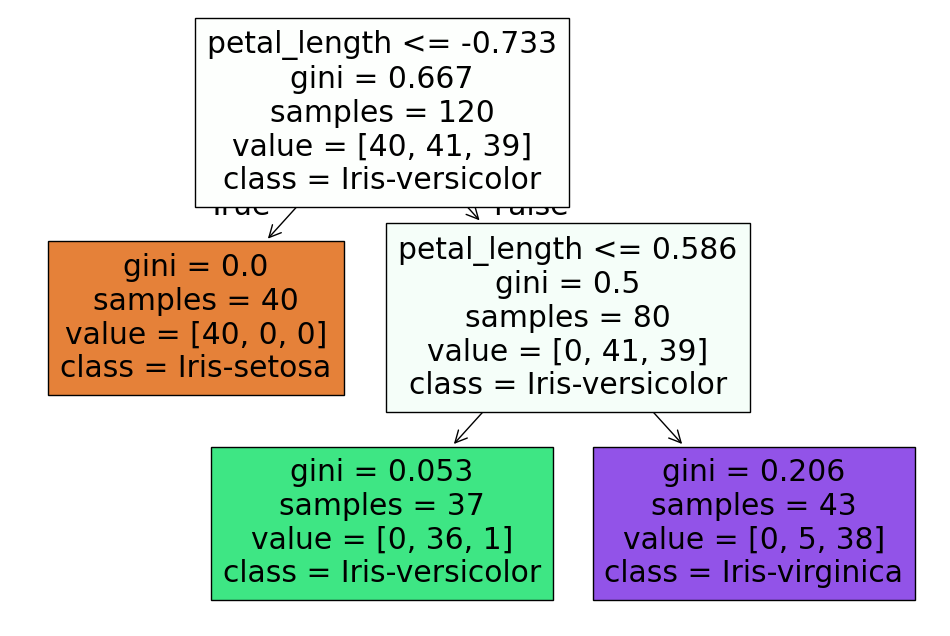

In [102]:
plt.figure(figsize=(12, 8))
plot_tree(DT, filled=True, feature_names=x_train.columns, class_names=y_train.unique())
plt.show()

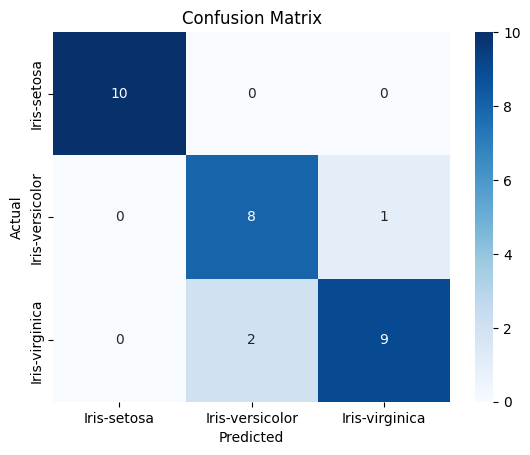

In [89]:
cm=confusion_matrix(y_test_enc,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

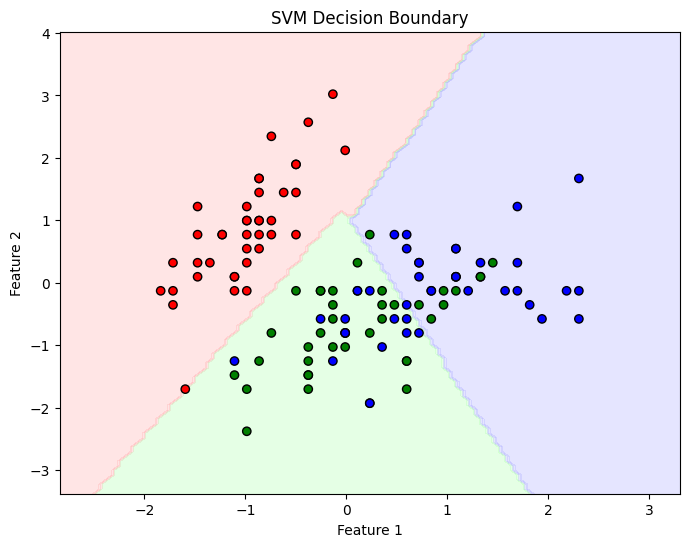

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_plot = x_train_scaled[:, [0, 1]]  # Use first two features
y_plot = y_train_enc

# Train an SVM model with selected features
svm_model_2D = SVC(kernel="linear").fit(X_plot, y_plot)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = svm_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ["r", "g", "b"]

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=ListedColormap(cmap_bold), edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.legend(handles=scatter.legend_elements()[0], labels=label_encoder.classes_)
plt.show()


                         sepal_length  sepal_width  petal_length  petal_width  \
sepal_length                 1.000000    -0.109369      0.871754     0.817954   
sepal_width                 -0.109369     1.000000     -0.420516    -0.356544   
petal_length                 0.871754    -0.420516      1.000000     0.962757   
petal_width                  0.817954    -0.356544      0.962757     1.000000   
species_Iris-versicolor      0.079396    -0.464700      0.201587     0.118376   
species_Iris-virginica       0.638020    -0.130901      0.721102     0.769134   

                         species_Iris-versicolor  species_Iris-virginica  
sepal_length                            0.079396                0.638020  
sepal_width                            -0.464700               -0.130901  
petal_length                            0.201587                0.721102  
petal_width                             0.118376                0.769134  
species_Iris-versicolor                 1.000000         

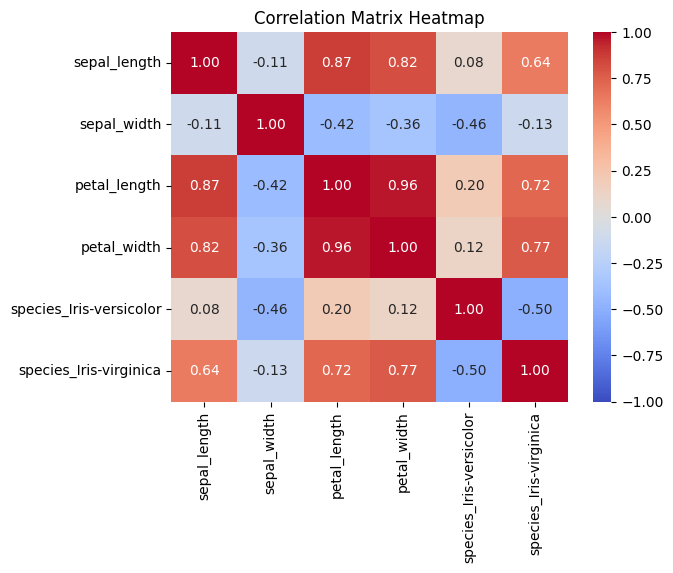

In [ ]:
df.columns = df.columns.str.strip() 

encoder=OneHotEncoder(drop="first",sparse_output=False)
encoded_features=encoder.fit_transform(df[["species"]])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['species']))
df=df.drop(columns=['species'])
df=pd.concat([df,encoded_df],axis=1)
df
correlation_matrix=df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [91]:
grid={
    "criterion":["gini","entropy"],
    "max_depth":[3,5,10,None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}
clf=GridSearchCV(DecisionTreeClassifier(random_state=42),grid,cv=5,scoring="accuracy")
clf.fit(x_train_scaled,y_train)
print("Best Parameters:", clf.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
